In [1]:
import pandas as pd
import numpy as np
import os

## HELPFUL FUNCTIONS

In [3]:
RESULTS_DIR = '/data/analysis/ag-reils/ag-reils-shared/cardioRS/results/interpretability/resample_multiplicities'
DATA_DIR = '/data/analysis/ag-reils/ag-reils-shared/cardioRS/data/interpretability/resample_multiplicities'
EVALUATION_DIR = '/data/analysis/ag-reils/ag-reils-shared/cardioRS/results/interpretability/resample_multiplicities/evaluation'

def col2numpy(df, colname):
    """
    convert a dataframe column to a numpy array
    :param df: dataframe
    :param colname: column name to convert to numpy array
    :return:
    """
    vals = df.loc[:, colname].values.tolist()
    vals_numpy = np.array([np.array(eval(row)) for row in vals])
    return vals_numpy

In [4]:
experiment_id = 'simpsons'

In [ ]:
method = 'FeaturePermutation'
xdf_fp = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/FullMeanError_x_{method}.csv', index_col=0)
ydf_fp = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/FullMeanError_y_{method}.csv', index_col=0)
for df in [xdf_fp, ydf_fp]:
    df.loc[:, 'attribution_method'] = method

In [ ]:
methods = ['FeatureAblation',
           'FeaturePermutation',
           'IntegratedGradients',
           'Lime',
           'KernelExplainer',
           'DeepExplainer']

In [ ]:
len(methods)

In [ ]:
experiment_id = 'p0.75'
dfs = []

for method in methods:
    xdata = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/FullMeanError_x_{method}.csv', index_col=0)
    absolute_error = col2numpy(xdata, 'absolute_error').flatten().tolist()
    median_absolute_error = col2numpy(xdata, 'median_absolute_error').flatten().tolist()
    squared_error = col2numpy(xdata, 'squared_error').flatten().tolist()
    median_squared_error = col2numpy(xdata, 'median_squared_error').flatten().tolist()
    df = pd.DataFrame(dict(abs_error = absolute_error, median_abs_error=median_absolute_error, squared_error=squared_error, median_squared_error=median_squared_error))
    df.loc[:, 'attribution_method'] = method
    df.loc[:, 'modified_attribute'] = 'noise_x'
    dfs.append(df)

    ydata = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/FullMeanError_y_{method}.csv', index_col=0)
    absolute_error = col2numpy(ydata, 'absolute_error').flatten().tolist()
    median_absolute_error = col2numpy(ydata, 'median_absolute_error').flatten().tolist()
    squared_error = col2numpy(ydata, 'squared_error').flatten().tolist()
    median_squared_error = col2numpy(ydata, 'median_squared_error').flatten().tolist()
    df = pd.DataFrame(dict(abs_error = absolute_error, median_abs_error=median_absolute_error, squared_error=squared_error, median_squared_error=median_squared_error))
    df.loc[:, 'attribution_method'] = method
    df.loc[:, 'modified_attribute'] = 'noise_y'
    dfs.append(df)

df = dfs[0]
dfs.pop(0)
full_df = df.append(dfs, ignore_index=True)

In [163]:
full_df

,abs_error,median_abs_error,squared_error,median_squared_error,attribution_method,modified_attribute
0,0.060589,0.393133,0.003671,0.154553,FeatureAblation,noise_x
1,0.079855,0.435194,0.006377,0.189394,FeatureAblation,noise_x
2,0.004367,0.036846,0.000019,0.001358,FeatureAblation,noise_x
3,0.070910,0.431774,0.005028,0.186429,FeatureAblation,noise_x
4,0.058443,0.381950,0.003416,0.145886,FeatureAblation,noise_x
...,...,...,...,...,...,...
3454195,0.212149,0.725996,0.045007,0.045007,DeepExplainer,noise_y
3454196,0.228355,0.831473,0.052146,0.052146,DeepExplainer,noise_y
3454197,0.297294,1.057357,0.088384,0.088384,DeepExplainer,noise_y
3454198,0.298171,0.976447,0.088906,0.088906,DeepExplainer,noise_y


Text(0.5, 0.98, 'p0.75')

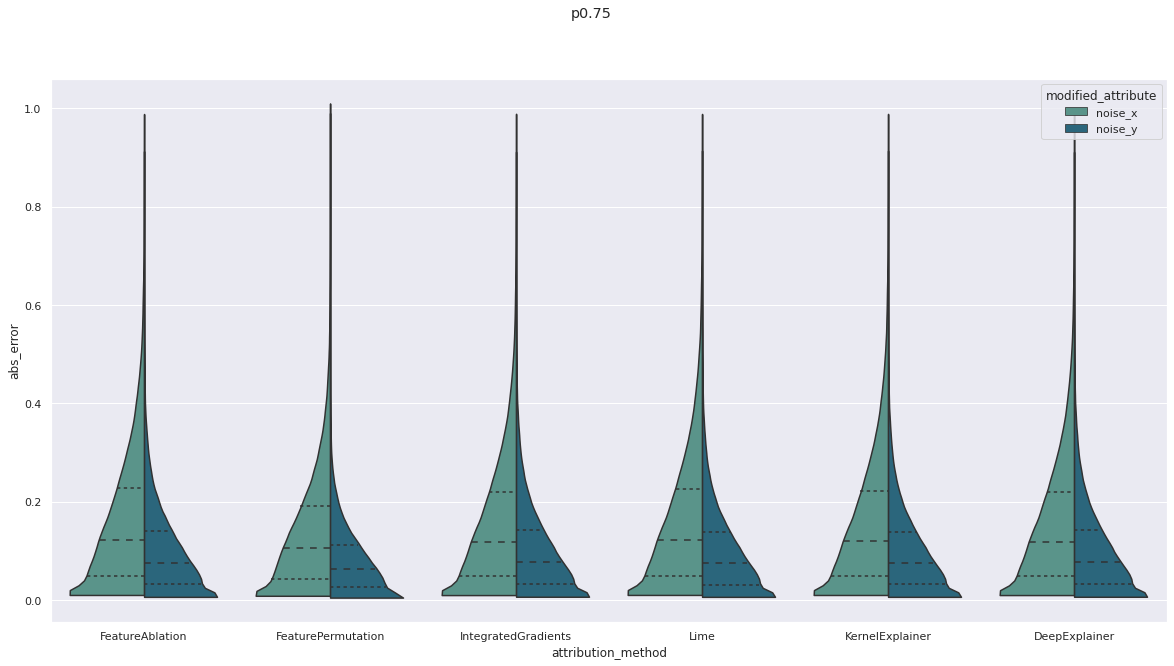

In [165]:
sns.set(rc={'figure.figsize':(20,10)})
sns.violinplot(data=full_df,
               x='attribution_method',
               y='abs_error',
               gridsize=100,
               split=True,
               scale='count',
               cut=-1,
               hue='modified_attribute',
               inner='quartile',
               palette='crest')
plt.suptitle(experiment_id)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import joypy

In [ ]:
labels = [x for x in list(full_df.attribution_method.unique())]

In [ ]:
labels

In [ ]:
full_df

In [ ]:
g = sns.displot(
    data=full_df, y="median_abs_error", col="attribution_method",
    kind="kde", height=4, aspect=.7,
)

In [ ]:
full_df

In [ ]:
np.square(-0.8345182571778358)

In [ ]:
np.log10(0.14638)

In [ ]:
full_df.loc[:, 'log10_abs'] = np.log10(full_df.abs_error)

In [ ]:
full_df

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.violinplot(data=full_df,
               x='attribution_method',
               y='squared_error',
               gridsize=100,
               split=True,
               scale='count',
               cut=-1,
               hue='modified_attribute',
               inner='quartile',
               palette='crest')
plt.suptitle(experiment_id)

In [170]:
x = np.zeros((10, 100))

In [171]:
x.shape

(10, 100)

In [177]:
b = np.random.normal(size=x.shape)

<AxesSubplot:xlabel='median_abs_error', ylabel='Density'>

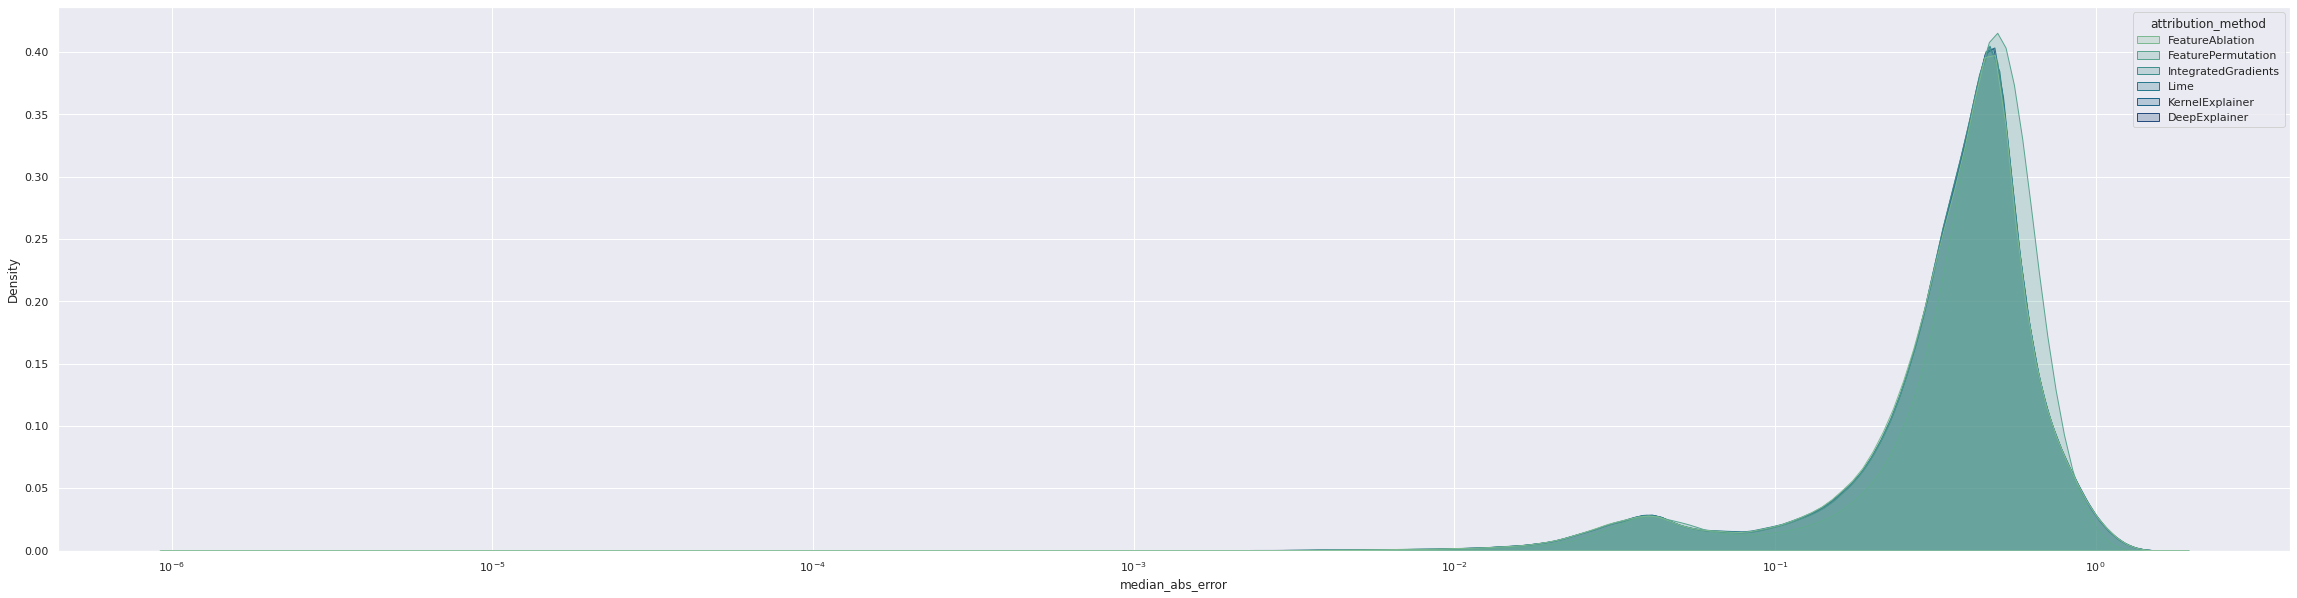

In [166]:
sns.set(rc={'figure.figsize':(40,10)})
sns.kdeplot(
    data=full_df, x="median_abs_error", hue="attribution_method",
    fill=True, common_norm=True, palette="crest",
    alpha=.25, log_scale=10,
)

In [6]:
import sys
sys.path.append('/home/ruyogagp/medical_interpretability')
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from cga import cga
import pandas as pd
import neptune.new as neptune
import wandb
import pytorch_lightning as pl
import torch.nn as nn
import torch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from source.tasks import DeepSurv

from captum.attr import *
from captum.metrics import *
from captum._utils.models.linear_model import SkLearnLinearRegression
from source.wrappers import ForwardWrapper
import os
import seaborn as sns

In [8]:
# TODO: this works if the second tag is the experiment identifier
def load_details(run):
    dir = '/data/analysis/ag-reils/ag-reils-shared/cardioRS/data/interpretability/resample_multiplicities'
    try:
        path = f'{dir}/{run.tags[0]}_attribute_details.csv'
        details_df = pd.read_csv(path)
    except FileNotFoundError:
        path = f'{dir}/{run.tags[1]}_attribute_details.csv'
        details_df = pd.read_csv(path)
    print(f'reading {path}')
    return details_df, path

def output_diff(model, orig_features, resampled_features):
    orig_output, *_ = model(orig_features)
    resampled_output, *_ = model(resampled_features)
    with torch.no_grad():
        diff = torch.sub(orig_output, resampled_output)
    return diff.detach().numpy()

# CREATE TUPLES FOR MODEL DIFF

def col2numpy(df, colname):
    """
    convert a dataframe column to a numpy array
    :param df: dataframe
    :param colname: column name to convert to numpy array
    :return:
    """
    vals = df.loc[:, colname].values.tolist()
    vals_numpy = np.array([np.array(eval(row)) for row in vals])
    return vals_numpy

def clip_norm2d(array, tail):
    """
    clips and normalizes the array to the range of [-1, 1]
    :param array: array to be normalized
    :return: normalized array
    """
    array_norm = np.zeros((array.shape))
    c_array = np.zeros((array.shape))
    for i in range(array.shape[0]):
        column = array[i, :]
        outliers = np.percentile(column, [tail, 100-tail])
        clipped_array = np.clip(column, *outliers)
        col_norm = clipped_array / abs(clipped_array).max()
        #TODO: !!!!!FIX THIS!!!!
        array_norm[i, :] = col_norm
        c_array[i, :] = clipped_array
    return  array_norm, c_array

def clip_norm1d(array, tail):
    """
    clips and normalizes the array to the range of [-1, 1]
    :param array:  array to be normalized
    :return: normalized array
    """
    outliers = np.percentile(array, [tail, 100-tail])
    clipped_array = np.clip(array, *outliers)
    array_norm = clipped_array / abs(clipped_array).max()
    return array_norm, clipped_array

def load_attributions(run, method, n_features=5):
    attribution_list = [np.genfromtxt(run.config[f'{method}_feature{idx}_path'], delimiter=',') for idx in range(n_features)]
    return attribution_list

def reject_outliers(data, m = 150.0):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    max = data[s<m].max()
    min = data[s<m].min()
    out = np.where(s<m, data, np.where(data>0, max, min))
    return out

def clip2d(array):
    clipped_array = np.zeros((array.shape))
    for i in range(array.shape[0]):
        clipped_array[i, :] = reject_outliers(array[i, :])
    return clipped_array

In [10]:
def calculate_change_slope(experiment_id, n_features=5):
    """
    Calculates change slope for each run
    :param experiment_id: experiment identifier
    :return: None -> saves the change slope per run
    """
    api = wandb.Api()
    runs =  api.runs('cardiors/interpretability',
                     filters={"$and": [{'tags': f'{experiment_id}'}, {'tags': 'resample_multiplicities'}, {'state': 'finished'}]})
    print(len(runs))
    for run in runs:
        for idx in range(n_features):
            resampling_df = pd.read_csv(f'/data/analysis/ag-reils/ag-reils-shared/cardioRS/data/interpretability/resample_multiplicities/{experiment_id}_resampling_feature{idx}.csv', index_col=0)
            print(f'read /data/analysis/ag-reils/ag-reils-shared/cardioRS/data/interpretability/resample_multiplicities/{experiment_id}_resampling_feature{idx}.csv')
            intervention_df = pd.read_csv(f'/data/analysis/ag-reils/ag-reils-shared/cardioRS/data/interpretability/resample_multiplicities/{experiment_id}_attribute_details.csv')
            intervention_df = intervention_df[intervention_df['modified_attribute']==f'noise{idx}']
            model = DeepSurv.load_from_checkpoint(run.config['checkpoint_path'])

            # create orig and resampling tensors
            orig_features = [f'feature{idx}_orig' for idx in range(n_features)]
            orig_tensor = torch.Tensor(resampling_df[orig_features].to_numpy(dtype='float64'))
            resamp_tensors = []
            resamp_vals = col2numpy(resampling_df, f'feature{idx}_resampling')
            for i_intervention in range(100):
                resamp_features = [f'feature{n}_intervention{i_intervention}' for n in range(n_features)]
                resamp_tensors.append(torch.Tensor(intervention_df.loc[:, resamp_features].to_numpy(dtype='float64')))

            # calculate model outputs
            orig_output = model(orig_tensor)[0].detach().numpy()
            resamp_outputs = None
            for i in range(resamp_vals.shape[1]):
                resamp_output = model(resamp_tensors[i])[0].detach().numpy()
                resamp_outputs = resamp_output if resamp_outputs is None else np.concatenate((resamp_outputs, resamp_output), axis=1)


            # calculate change_slope
            model_diff = np.subtract(orig_output, resamp_outputs)
            resampling_diff = col2numpy(resampling_df, 'resampling_diff')
            change_slope = np.true_divide(model_diff, resampling_diff)
            clipped_mean_cs = np.mean(clip2d(change_slope), axis=1)
            mean_cs = np.mean(change_slope, axis=1)
            median_cs = np.median(change_slope, axis=1)


            # save values in dataframe
            resampling_df.loc[:, 'model_diff'] = model_diff.tolist()
            resampling_df.loc[:, 'change_slope'] = change_slope.tolist()
            resampling_df.loc[:, 'mean_cs'] = mean_cs
            resampling_df.loc[:, 'clipped_mean_cs'] = clipped_mean_cs
            resampling_df.loc[:, 'median_cs'] = median_cs
            methods = ['FeatureAblation',
                       'FeaturePermutation',
                       'IntegratedGradients',
                       'Lime',
                       'KernelExplainer',
                       'DeepExplainer',
                       'ShapleyValueSampling']


            for method in methods:
                attribution_list = load_attributions(run, method, n_features=n_features)
                resampling_df.loc[:, f'{method}_feature{idx}'] = attribution_list[idx].tolist()

            # Save dataframes
            EVALUATION_DIR = '/data/analysis/ag-reils/ag-reils-shared/cardioRS/results/interpretability/resample_multiplicities/evaluation'
            if not os.path.exists(f'{EVALUATION_DIR}/{experiment_id}'):
                os.mkdir(f'{EVALUATION_DIR}/{experiment_id}')

            if not os.path.exists(f'{EVALUATION_DIR}/{experiment_id}/change_slope'):
                os.mkdir(f'{EVALUATION_DIR}/{experiment_id}/change_slope')

            # bit sus but it works
            seed = int(run.config['Lime_feature0_path'].split('_')[-1][:-4])

            resampling_df.to_csv(f'{EVALUATION_DIR}/{experiment_id}/change_slope/feature{idx}_{seed}.csv')
            print(f'Wrote {EVALUATION_DIR}/{experiment_id}/change_slope/feature{idx}_{seed}.csv')

In [11]:
calculate_change_slope('linear_decreasing_2', n_features =5)

12
read /data/analysis/ag-reils/ag-reils-shared/cardioRS/data/interpretability/resample_multiplicities/linear_decreasing_2_resampling_feature0.csv
Wrote /data/analysis/ag-reils/ag-reils-shared/cardioRS/results/interpretability/resample_multiplicities/evaluation/linear_decreasing_2/change_slope/feature0_266.csv
read /data/analysis/ag-reils/ag-reils-shared/cardioRS/data/interpretability/resample_multiplicities/linear_decreasing_2_resampling_feature1.csv
Wrote /data/analysis/ag-reils/ag-reils-shared/cardioRS/results/interpretability/resample_multiplicities/evaluation/linear_decreasing_2/change_slope/feature1_266.csv
read /data/analysis/ag-reils/ag-reils-shared/cardioRS/data/interpretability/resample_multiplicities/linear_decreasing_2_resampling_feature2.csv
Wrote /data/analysis/ag-reils/ag-reils-shared/cardioRS/results/interpretability/resample_multiplicities/evaluation/linear_decreasing_2/change_slope/feature2_266.csv
read /data/analysis/ag-reils/ag-reils-shared/cardioRS/data/interpretab

In [ ]:
dfs.pop(0)
len(dfs)

In [ ]:
len(dfs)

In [ ]:
dfs[0]

In [ ]:
xdfs[2]

In [ ]:
len(xdfs)

In [ ]:
xdf = xdf[0].append()

In [ ]:
xdf_fp = pd.DataFrame(dict(abs_error = absolute_error))
xdf_fp.loc[:, 'attribution_method'] = method

In [ ]:
xdf_fp

In [ ]:
abs_error = absolute_error.flatten()

In [ ]:
abs_error.tolist()

In [ ]:
absolute_error.shape[]

In [ ]:
absolute_error[0]

In [ ]:
method = 'FeatureAblation'
xdf_fa = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_x_{method}.csv', index_col=0)
ydf_fa = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_y_{method}.csv', index_col=0)
for df in [xdf_fa, ydf_fa]:
    df.loc[:, 'attribution_method'] = method

method = 'FeaturePermutation'
xdf_fp = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_x_{method}.csv', index_col=0)
ydf_fp = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_y_{method}.csv', index_col=0)
for df in [xdf_fp, ydf_fp]:
    df.loc[:, 'attribution_method'] = method

method = 'KernelExplainer'
xdf_ke = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_x_{method}.csv', index_col=0)
ydf_ke = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_y_{method}.csv', index_col=0)
for df in [xdf_ke, ydf_ke]:
    df.loc[:, 'attribution_method'] = method

method = 'DeepExplainer'
xdf_de = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_x_{method}.csv', index_col=0)
ydf_de = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_y_{method}.csv', index_col=0)
for df in [xdf_de, ydf_de]:
    df.loc[:, 'attribution_method'] = method

method = 'IntegratedGradients'
xdf_ig = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_x_{method}.csv', index_col=0)
ydf_ig = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_y_{method}.csv', index_col=0)
for df in [xdf_ig, ydf_ig]:
    df.loc[:, 'attribution_method'] = method

method = 'InputXGradient'
xdf_ixg = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_x_{method}.csv', index_col=0)
ydf_ixg = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_y_{method}.csv', index_col=0)
for df in [xdf_ixg, ydf_ixg]:
    df.loc[:, 'attribution_method'] = method

method = 'Lime'
xdf_lime = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_x_{method}.csv', index_col=0)
ydf_lime = pd.read_csv(f'{EVALUATION_DIR}/{experiment_id}/MedianMeanError_y_{method}.csv', index_col=0)
for df in [xdf_lime, ydf_lime]:
    df.loc[:, 'attribution_method'] = method

full_xdf = xdf_de.append([xdf_lime, xdf_ixg, xdf_ig, xdf_fa, xdf_ke, ], ignore_index=True)
full_xdf.loc[:, 'modified_attribute'] = 'noise_x'
full_ydf = ydf_de.append([ydf_lime, ydf_ixg, ydf_ig, ydf_fa, ydf_ke, ], ignore_index=True)
full_ydf.loc[:, 'modified_attribute'] = 'noise_y'
full_df = full_xdf.append(full_ydf, ignore_index=True)

full_df = full_xdf if dimension=='x' else full_ydf if dimension=='y' else full_xdf.append(full_ydf, ignore_index=True)
sns.set(rc={'figure.figsize':(20,10)})
sns.violinplot(data=full_df,
               x='attribution_method',
               y=metric,
               split=True,
               scale='count',
               hue='modified_attribute',
               inner='quartile',
               palette='Spectral_r')
plt.suptitle(experiment_id)
return full_df